# Case Tractian

## Parte 1 - Data ETL, Data Wrangling e Data Exploration

In [1]:
import pandas as pd
import os
import glob

In [2]:
raw_data1_path = '../raw_data/part1/'
raw_data2_path = '../raw_data/part2/'
output_data_path = '../output_data/'
image_path = '../image/'

### 1.1. Extração dos dados

- Em cada arquivo existe uma coleta de vibração realizada pelo sensor “band-aid”.
- O nome do arquivo traz as seguintes informações: “{start}-{interval}-{sensor_id}.bin”
    - Exemplo: 1623535615-3006-IAJ9206.csv
        - start: 1623535615 [epoch Unix]
        - interval - sampling duration: 3006 [ms]
        - sensor_id: IAJ9206 [string que identifica um sensor]
- As coletas dizem respeito aos dados de aceleração em g nos eixos X, Y, Z de um acelerômetro.

In [3]:
IAJ9206 = pd.read_csv(raw_data1_path + '1623535615-3006-IAJ9206.csv')
NAH4736 = pd.read_csv(raw_data1_path + '1624962426-3006-NAH4736.csv')
MYS2071 = pd.read_csv(raw_data1_path + '1624374799-3006-MYS2071.csv')
NAI1549 = pd.read_csv(raw_data1_path + '1624040490-2957-NAI1549.csv')

In [4]:
# Exemplo de dados

IAJ9206.head()

,x,y,z
0,-1.003174,-0.097778,-0.017334
1,-0.993591,-0.084778,-0.009766
2,-0.964844,-0.048462,0.062012
3,-0.868591,-0.010437,0.103577
4,-0.885498,-0.041992,0.078003


### 1.2. Dados contidos no domínio do tempo

<AxesSubplot:>

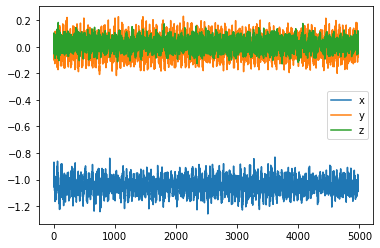

In [5]:
_ = IAJ9206.plot(kind = 'line')

_